<a href="https://colab.research.google.com/github/OptimalDecisions/sports-analytics-foundations/blob/main/data-visualization/Data_Visualization_3_5_Customizing_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Data Visualization



  # Customizing Plots using Matplotlib
  
  <img src = "../img/sa_logo.png" width="100" align="left">

  Ram Narasimhan

  <br><br><br>

  << [3.0 Visualization Overview](Data_Visualization_3_0_Overview.ipynb) | [3.1 Visualization Using Pandas](Pandas_Intermediate_2_10_GroupBy.ipynb)  |
  [3.2 Matplotlib Basics](Data_Visualization_3_2_Matplotlib_Basics.ipynb) >>




Concepts covered in this notebook:

1. Generating a base plot
2. Convert it to a Bar Plot
3. Changing the figure size
4. Adding Titles and Labels
5. Change the Bar Colors (based on win/loss)
6. Rotating Tickmarks for readability
7. Changing Axis limits
8. Adding Grid
9. Customizing Legend Text and Position





Matplotlib's strength is in how we can customize various aspects of a base plot.

We can modify the different default parameters to create visually appealing and informative visualizations.


In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 0 Get the Data Ready


In [87]:
url = 'https://raw.githubusercontent.com/OptimalDecisions/sports-analytics-foundations/main/data/nfl_2022_tidy.csv'
df = pd.read_csv(url)

In [88]:

df.columns

Index(['Week', 'Team', 'Won', 'Metric', 'Value'], dtype='object')

In [89]:
df.sample(4)

,Week,Team,Won,Metric,Value
491,14,Arizona Cardinals,False,YdsL,323.0
126,09,Minnesota Vikings,True,YdsW,301.0
1007,11,Chicago Bears,False,PtsL,24.0
53,04,Tennessee Titans,True,YdsW,243.0


In [90]:
sf = df[df['Team'].str.contains('49er')].copy()
sf.shape

(40, 5)

In [91]:
sfpts = sf[sf['Metric'].str.startswith('Pts')].copy()
sfyds = sf[sf['Metric'].str.startswith('Yds')].copy()

In [92]:
sfpts.dtypes

Week       object
Team       object
Won          bool
Metric     object
Value     float64
dtype: object

### 1 Create a Base Plot

Use  `plt.plot()` to create a basic plot.
|


<Axes: xlabel='Week'>

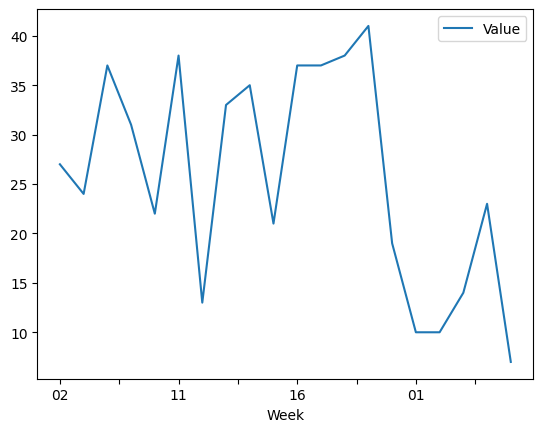

In [93]:
sfpts.plot(x='Week', y='Value')

<Axes: xlabel='Week'>

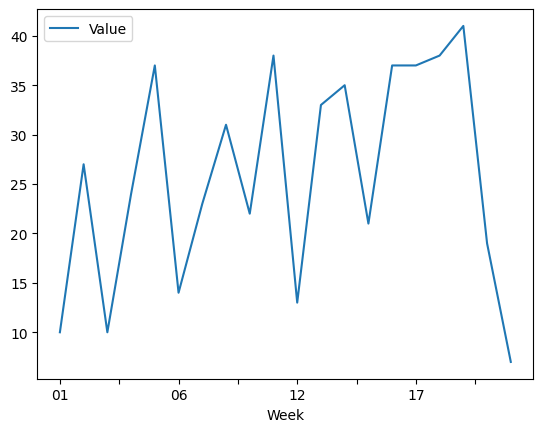

In [94]:
sfpts = sfpts.sort_values('Week')
sfpts.plot(x='Week', y='Value')

This is just a start. There is so much we still need to change! First of all, we don't want a Line Plot. A bar plot conveys the points scored by week a lot better.

### 2 Convert to a Bar Plot

<Axes: xlabel='Week'>

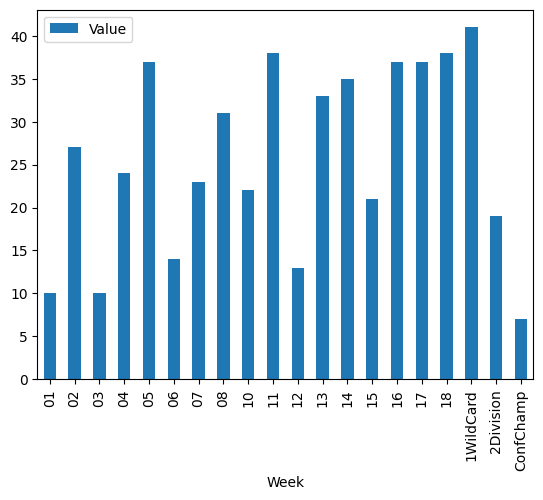

In [95]:

sfpts.plot(x='Week', y='Value', kind='bar')

In [96]:
sfpts

,Week,Team,Won,Metric,Value
855,01,San Francisco 49ers,False,PtsL,10.0
593,02,San Francisco 49ers,True,PtsW,27.0
898,03,San Francisco 49ers,False,PtsL,10.0
631,04,San Francisco 49ers,True,PtsW,24.0
643,05,San Francisco 49ers,True,PtsW,37.0
933,06,San Francisco 49ers,False,PtsL,14.0
956,07,San Francisco 49ers,False,PtsL,23.0
686,08,San Francisco 49ers,True,PtsW,31.0
716,10,San Francisco 49ers,True,PtsW,22.0
731,11,San Francisco 49ers,True,PtsW,38.0


### 3 Change `figsize` for the Plot



<Axes: xlabel='Week'>

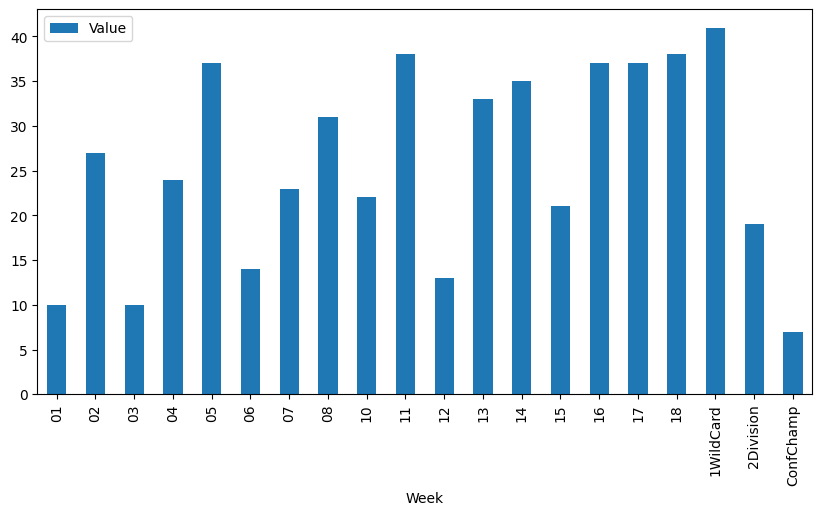

In [97]:
sfpts.plot(x='Week', y='Value', kind='bar', figsize=(10,5))

### 4 Add title and Axis Labels

<Figure size 1000x500 with 0 Axes>

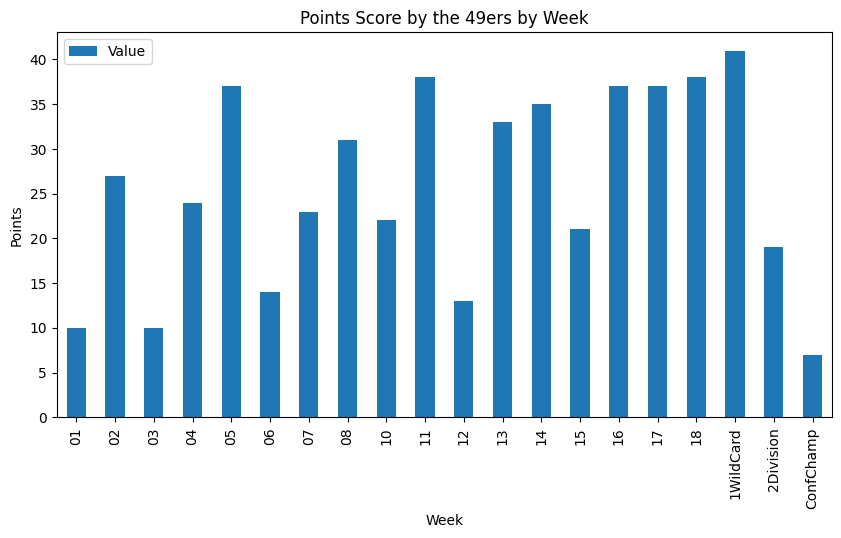

In [98]:
plt.figure(figsize=(10, 5))
sfpts.plot(x='Week', y='Value', kind='bar', figsize=(10,5))
plt.title('Points Score by the 49ers by Week')
plt.xlabel('Week')
plt.ylabel('Points')
plt.show()

### 5 Change Bar Color based on Win or Loss

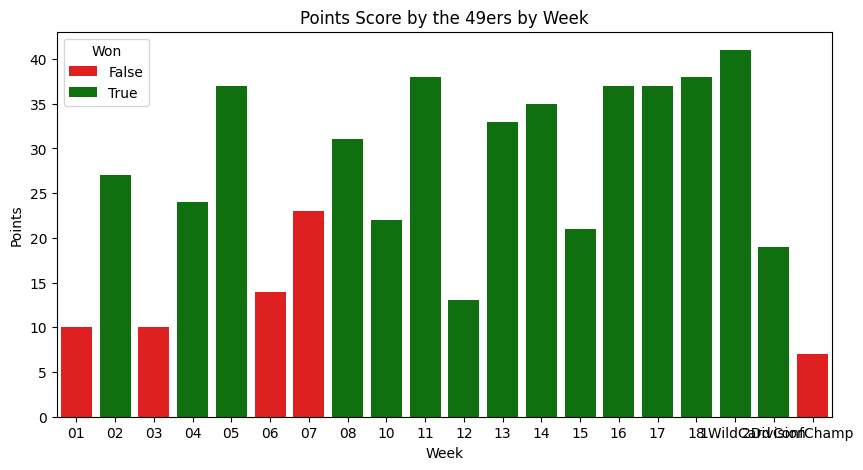

In [99]:
plt.figure(figsize=(10, 5))

sns.barplot(x='Week', y='Value',
            data=sfpts, hue='Won', palette={True: 'green', False: 'red'})
plt.title('Points Score by the 49ers by Week')
plt.xlabel('Week')
plt.ylabel('Points')
plt.show()

### 6 Rotate x-tickmarks by 45 degrees (for readability)

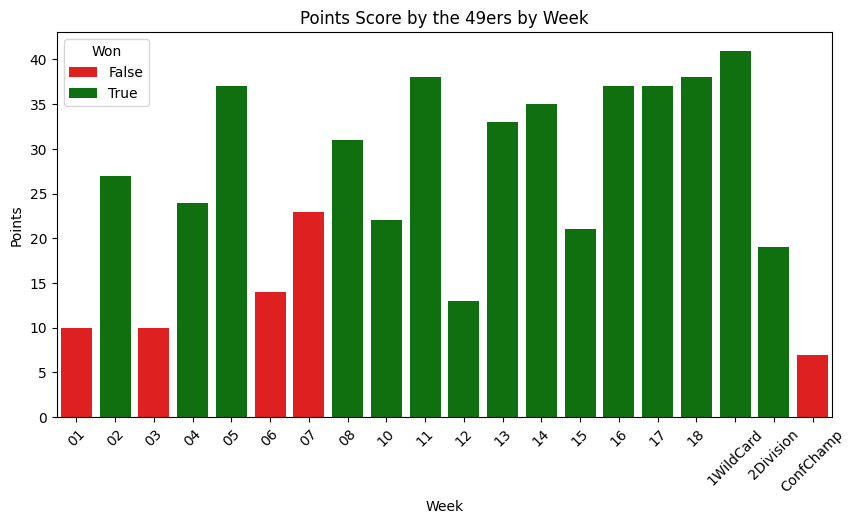

In [100]:
plt.figure(figsize=(10, 5))

sns.barplot(x='Week', y='Value',
            data=sfpts, hue='Won', palette={True: 'green', False: 'red'})
plt.title('Points Score by the 49ers by Week')
plt.xlabel('Week')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()


### 7 Changing Axis Limits

Matplotlib allows us to easily cusomize the axis limits -- the range of values that we wish to show in the plot.

```
plt.ylim(0, 60)
```

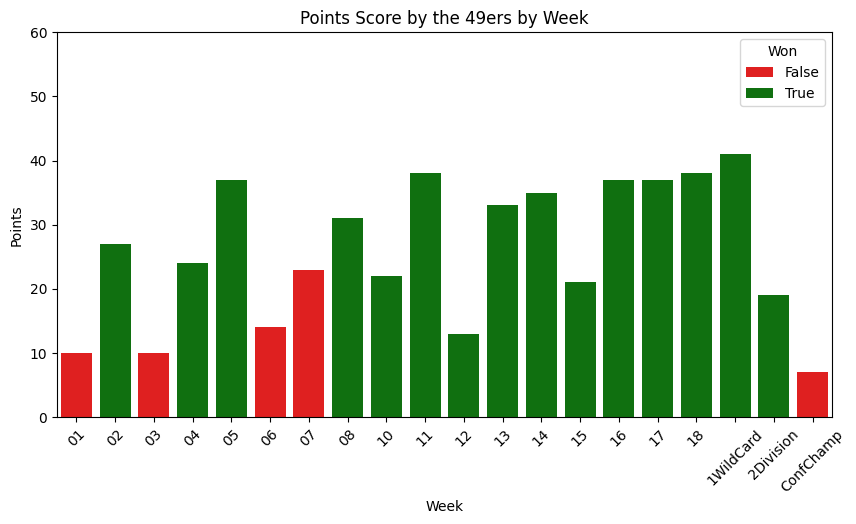

In [101]:
plt.figure(figsize=(10, 5))

sns.barplot(x='Week', y='Value',
            data=sfpts, hue='Won', palette={True: 'green', False: 'red'})
plt.title('Points Score by the 49ers by Week')
plt.xlabel('Week')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.ylim(0, 60)
plt.show()

### 8 Add a Grid (or Horizonal lines)
```
# Display only horizontal gridlines
plt.grid(axis='y')

```

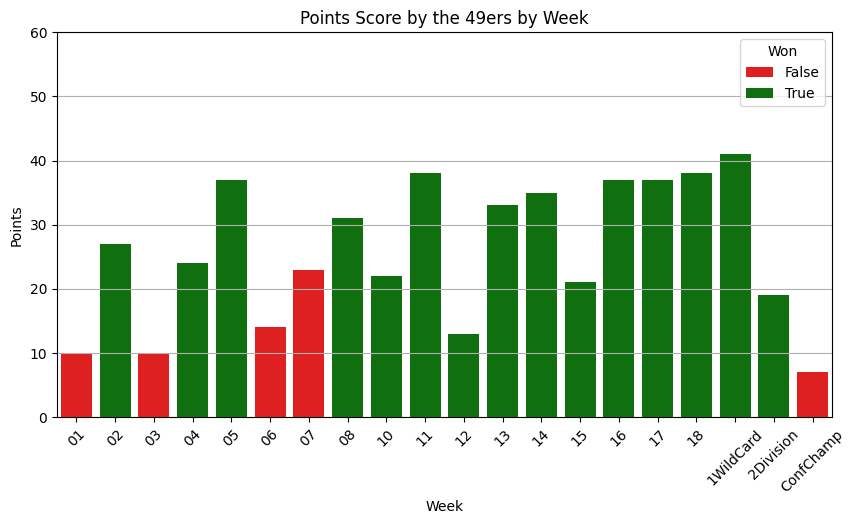

In [102]:
plt.figure(figsize=(10, 5))

sns.barplot(x='Week', y='Value',
            data=sfpts, hue='Won', palette={True: 'green', False: 'red'})
plt.title('Points Score by the 49ers by Week')
plt.xlabel('Week')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.ylim(0, 60)

# Display only horizontal gridlines
plt.grid(axis='y')
plt.show()


### 9 Customize Legend Text and Position

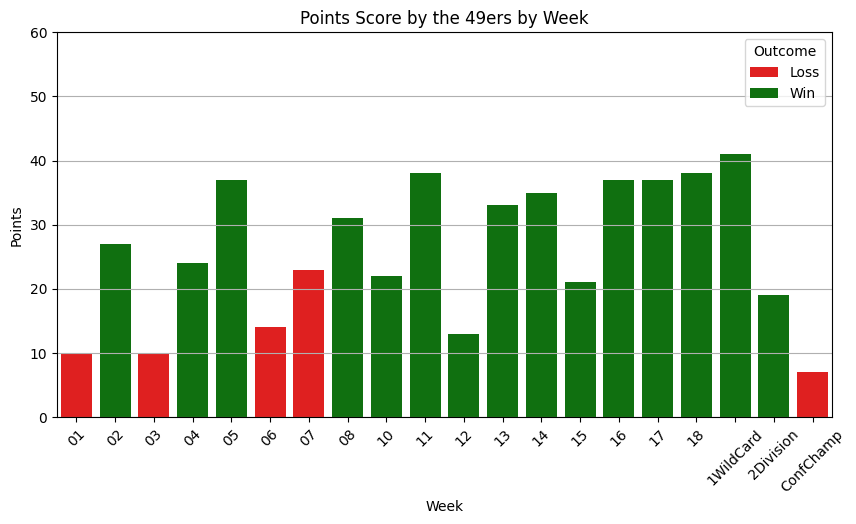

In [103]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(x='Week', y='Value',
            data=sfpts, hue='Won',
            palette={True: 'green', False: 'red'},
                 )

plt.title('Points Score by the 49ers by Week')
plt.xlabel('Week')

plt.ylabel('Points')
plt.xticks(rotation=45)
plt.ylim(0, 60)
# Display only horizontal gridlines
plt.grid(axis='y')

# Customize legend labels and position

lh, l = ax.get_legend_handles_labels()

#this is how we wish to re-label
new_label  = {'True': 'Win', 'False':'Loss'}
new_labels = []
for label in ax.get_legend().get_texts():
  old_text = label.get_text()
  new_labels.append(new_label[old_text])

# render all the elements of the Legend
ax.legend(handles = lh, labels = new_labels,
           title='Outcome', loc='upper right')


plt.show()

### 10 Annotate each Bar to show the points scored



Each bar is called a "Patch" in matplotlib. We get the bar's height, get its y-axis value, and use those to annotate the space right above the bar.

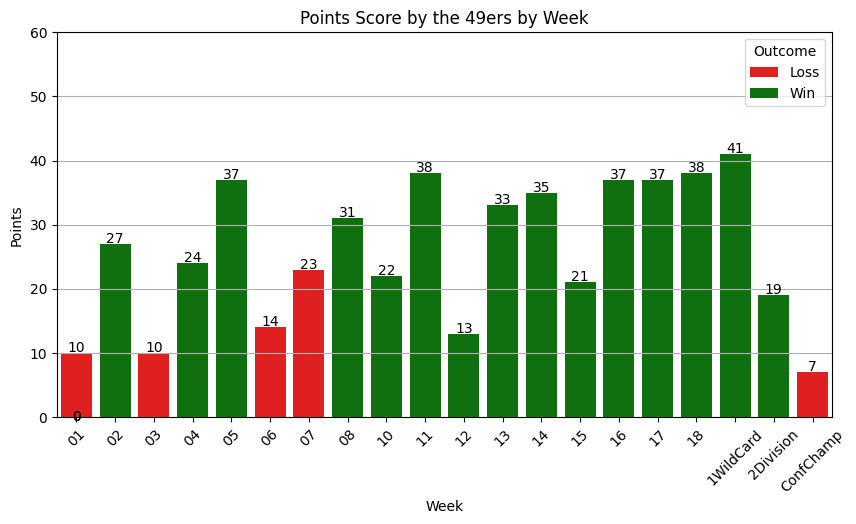

In [104]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(x='Week', y='Value',
            data=sfpts, hue='Won',
            palette={True: 'green', False: 'red'},
                 )
plt.title('Points Score by the 49ers by Week')
plt.xlabel('Week')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.ylim(0, 60)
# Display only horizontal gridlines
plt.grid(axis='y')

# Customize legend labels and position

lh, l = ax.get_legend_handles_labels()

#this is how we wish to re-label
new_label  = {'True': 'Win', 'False':'Loss'}
new_labels = []
for label in ax.get_legend().get_texts():
  old_text = label.get_text()
  new_labels.append(new_label[old_text])

# render all the elements of the Legend
ax.legend(handles = lh, labels = new_labels,
           title='Outcome', loc='upper right')

# Add text labels to the bars
# Format is Text(x_position, y_position, some_string)
for bar in ax.patches:
    bar_value = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar_value + bar.get_width(),
            f'{int(bar_value)}', va='center', ha='center')

plt.show()


  << [3.0 Visualization Overview](Data_Visualization_3_0_Overview.ipynb) | [3.1 Visualization Using Pandas](Pandas_Intermediate_2_10_GroupBy.ipynb)  |
  [3.2 Matplotlib Basics](Data_Visualization_3_2_Matplotlib_Basics.ipynb) >>
